In [1]:
#Common DS Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Stats Libraries
import scipy.stats as stats

#Modeling
from sklearn.cluster import KMeans
import sklearn.preprocessing


#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

from itertools import combinations

import env
import wrangle_mall

# Clustering with the Iris Dataset


Using this lesson as a guide, perform clustering on the iris dataset.

- Choose features other than the ones used in the lesson.

In [2]:
df_iris = sns.load_dataset('iris')
df_iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [3]:
x = df_iris[['petal_length', 'petal_width']]
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_length  150 non-null    float64
 1   petal_width   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


### Visualize the results of your clustering.

In [4]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

kmeans.predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

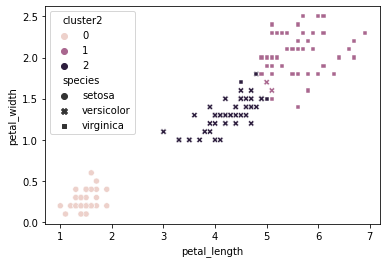

In [5]:
df_iris['cluster2'] = kmeans.predict(x)
sns.scatterplot(data=df_iris, x='petal_length',y='petal_width', hue = 'cluster2',style='species')
plt.show()

### Use the elbow method to visually select a good value for k.

Text(0.5, 1.0, 'Change in inertia as k increases')

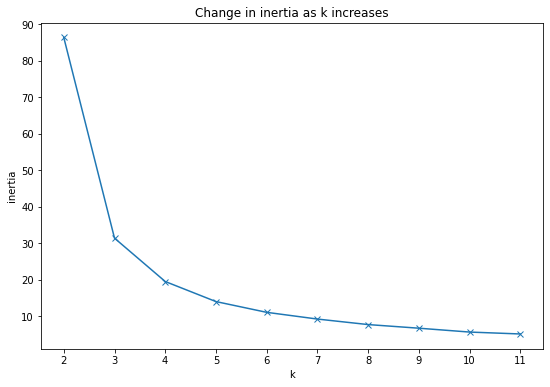

In [6]:
plt.style.context('seaborn-whitegrid')
plt.figure(figsize=(9, 6))
pd.Series({k: KMeans(k).fit(x).inertia_ for k in range(2, 12)}).plot(marker='x')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')

### Repeat the clustering, this time with 3 different features.


In [7]:
x3 = df_iris[['sepal_width','petal_length','petal_width']]

In [8]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x3)

kmeans.predict(x3)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

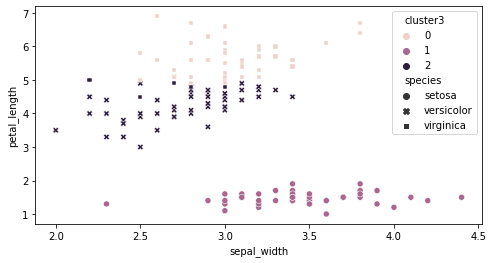

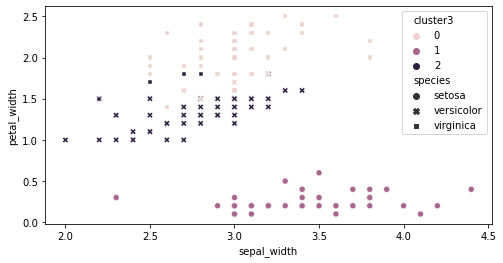

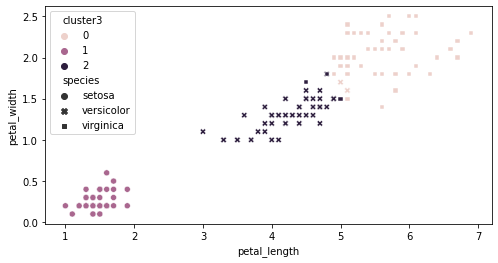

In [9]:
df_iris['cluster3'] = kmeans.predict(x3)
combos = list(combinations(x3.columns,2))

for i in combos:
    plt.figure(figsize = (8,4))
    sns.scatterplot(data=df_iris, x=i[0],y=i[1], hue = 'cluster3', style='species')
    plt.show()

# 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [10]:
df = wrangle_mall.get_mall()

In [11]:
df.head(5)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
xmall = df[['gender','age','annual_income','spending_score']]
xmall['is_male'] = np.where(xmall.gender == 'Male',1,0)
xmall.drop(columns = 'gender', inplace=True)

In [13]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(xmall)

kmeans.predict(xmall)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [14]:
combos = list(combinations(xmall.columns,2))
combos

[('age', 'annual_income'),
 ('age', 'spending_score'),
 ('age', 'is_male'),
 ('annual_income', 'spending_score'),
 ('annual_income', 'is_male'),
 ('spending_score', 'is_male')]

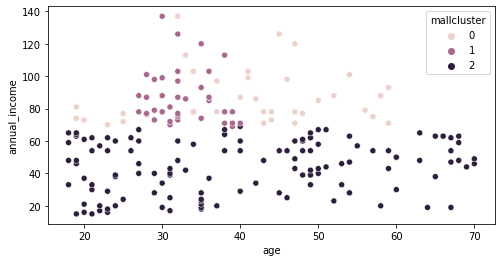

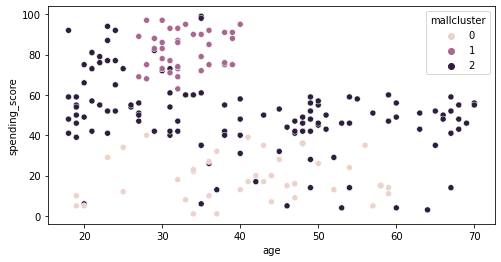

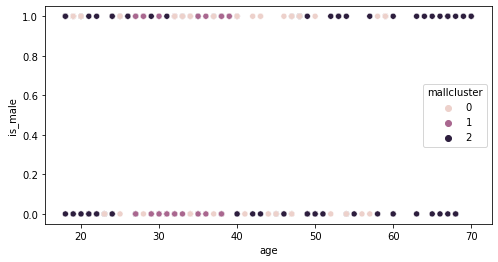

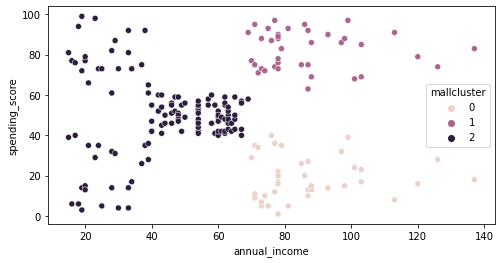

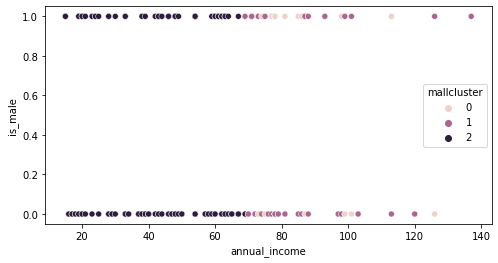

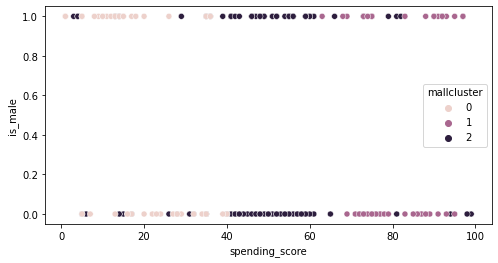

In [15]:
xmall['mallcluster'] = kmeans.predict(xmall)

for i in combos:
    plt.figure(figsize = (8,4))
    sns.scatterplot(data=xmall, x=i[0],y=i[1], hue = 'mallcluster')
    plt.show()

Text(0.5, 1.0, 'Change in inertia as k increases')

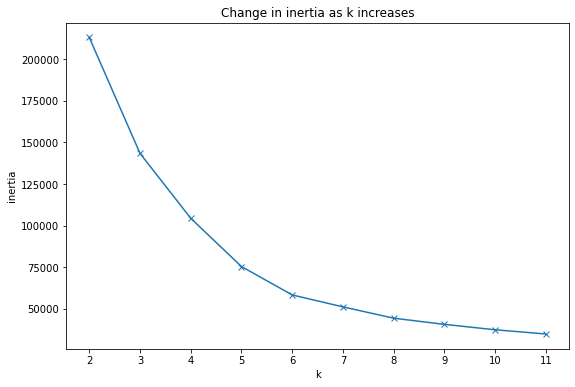

In [16]:
plt.style.context('seaborn-whitegrid')
plt.figure(figsize=(9, 6))
pd.Series({k: KMeans(k).fit(xmall).inertia_ for k in range(2, 12)}).plot(marker='x')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')

# 3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [17]:
mallcluster = xmall.mallcluster


xmall = xmall.drop(columns='mallcluster')

scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(xmall)

MinMaxScaler()

In [18]:
xmall_scaled = scaler.transform(xmall)
xmall_scaled = pd.DataFrame(xmall_scaled, columns= xmall.columns.values)
xmall_scaled['mallcluster'] = mallcluster
xmall['mallcluster'] = mallcluster
xmall_scaled

,age,annual_income,spending_score,is_male,mallcluster
0,0.019231,0.000000,0.387755,1.0,2
1,0.057692,0.000000,0.816327,1.0,2
2,0.038462,0.008197,0.051020,0.0,2
3,0.096154,0.008197,0.775510,0.0,2
4,0.250000,0.016393,0.397959,0.0,2
...,...,...,...,...,...
195,0.326923,0.860656,0.795918,0.0,1
196,0.519231,0.909836,0.275510,0.0,0
197,0.269231,0.909836,0.744898,1.0,1
198,0.269231,1.000000,0.173469,1.0,0


In [19]:
xmall

,age,annual_income,spending_score,is_male,mallcluster
0,19,15,39,1,2
1,21,15,81,1,2
2,20,16,6,0,2
3,23,16,77,0,2
4,31,17,40,0,2
...,...,...,...,...,...
195,35,120,79,0,1
196,45,126,28,0,0
197,32,126,74,1,1
198,32,137,18,1,0


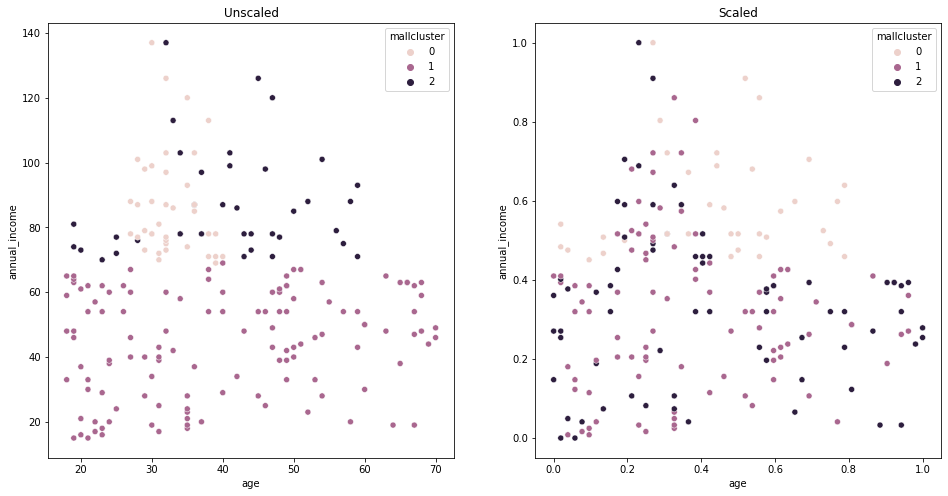

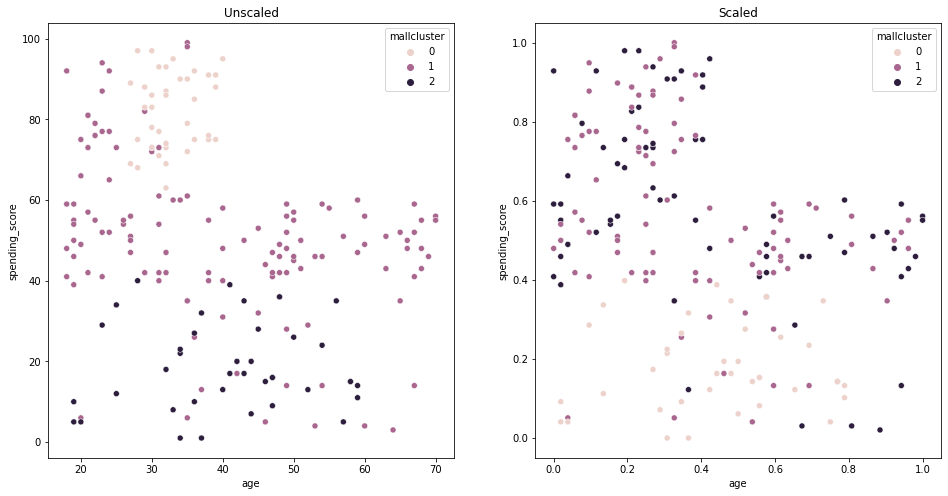

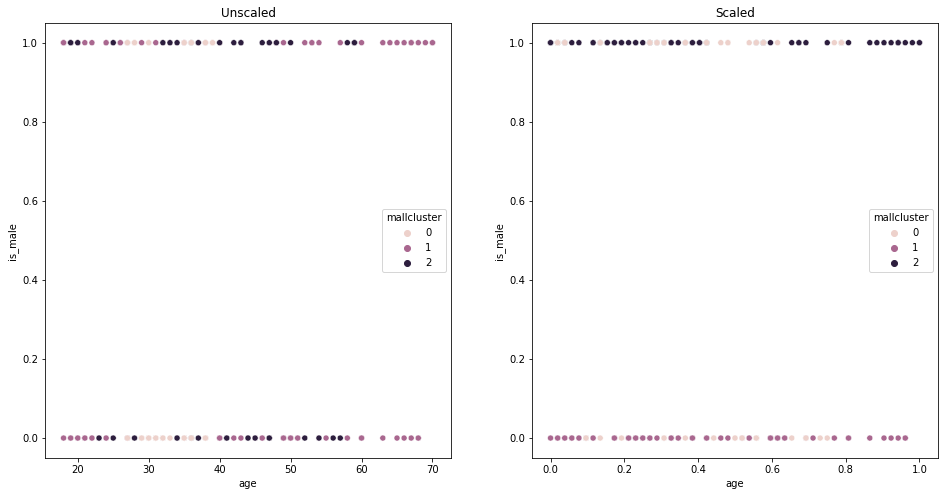

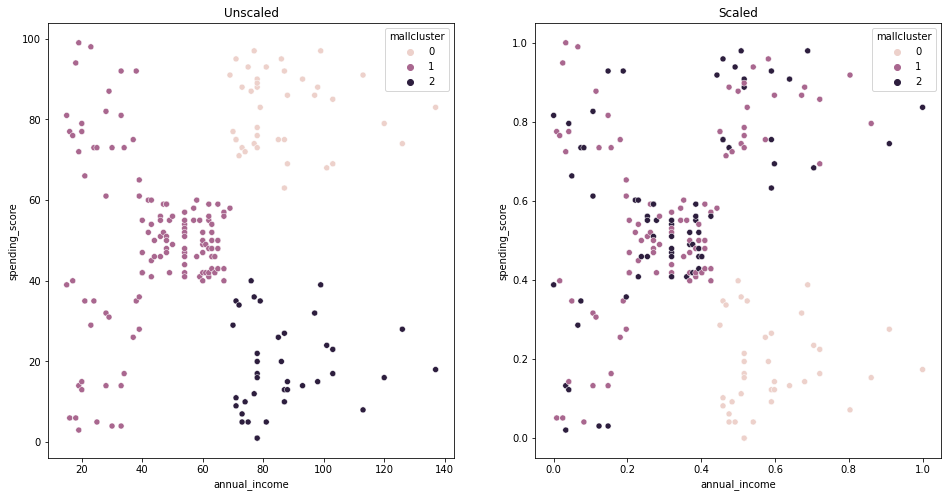

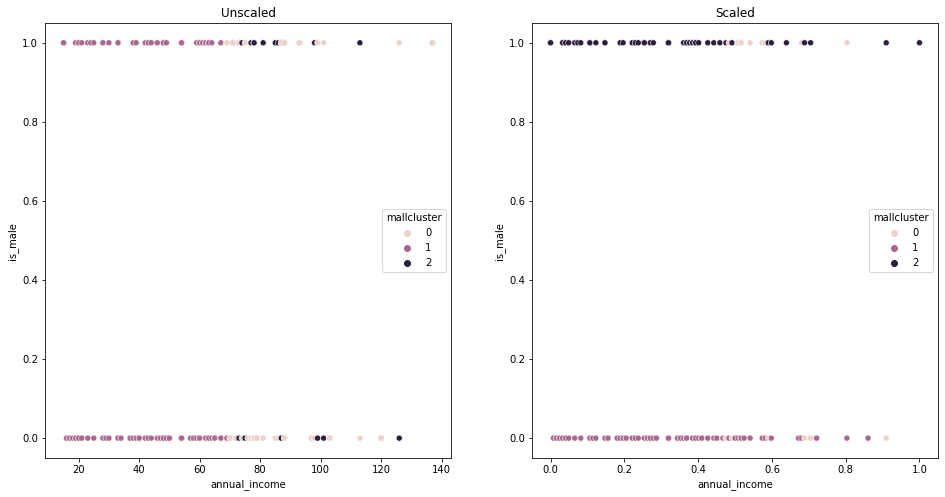

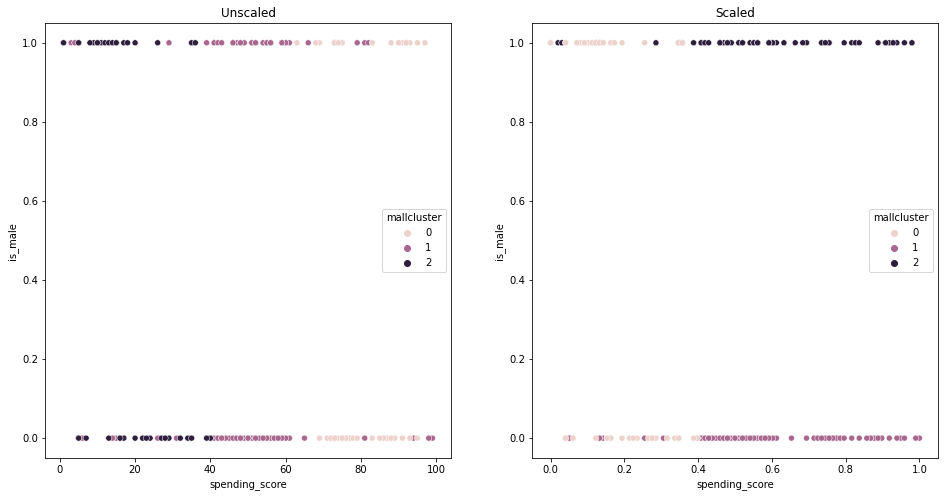

In [20]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(xmall)
kmeans.predict(xmall)
xmall['mallcluster'] = kmeans.predict(xmall)

kmeans_scaled = KMeans(n_clusters=3)
kmeans_scaled.fit(xmall_scaled)
kmeans_scaled.predict(xmall_scaled)
xmall_scaled['mallcluster'] = kmeans_scaled.predict(xmall_scaled)

for i in combos:
    plt.figure(figsize = (16,8))
    plt.subplot(121)
    plt.title('Unscaled')
    sns.scatterplot(data=xmall,x=i[0],y=i[1],  hue = 'mallcluster')
    plt.subplot(122)
    plt.title('Scaled')
    sns.scatterplot(data=xmall_scaled, x=i[0],y=i[1], hue = 'mallcluster')
    plt.show()

In [21]:
xmall2 = xmall.copy()
xmall2_scaled = xmall_scaled.copy()

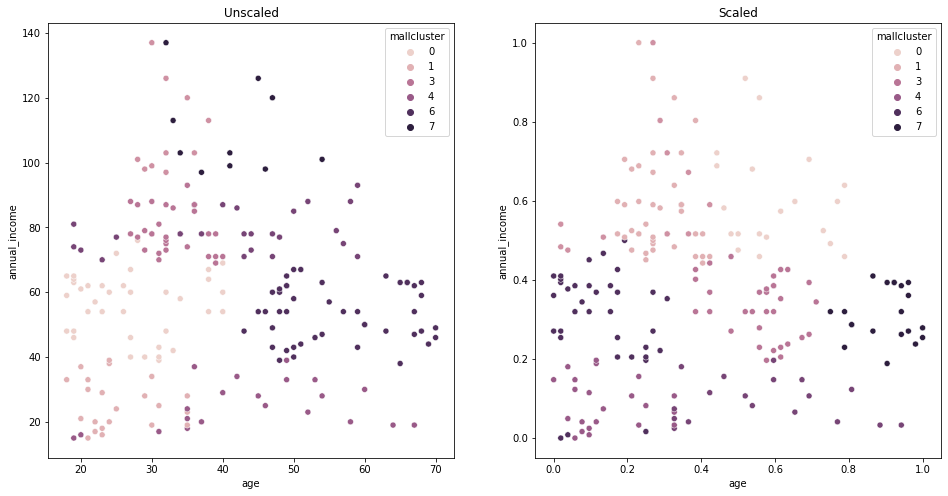

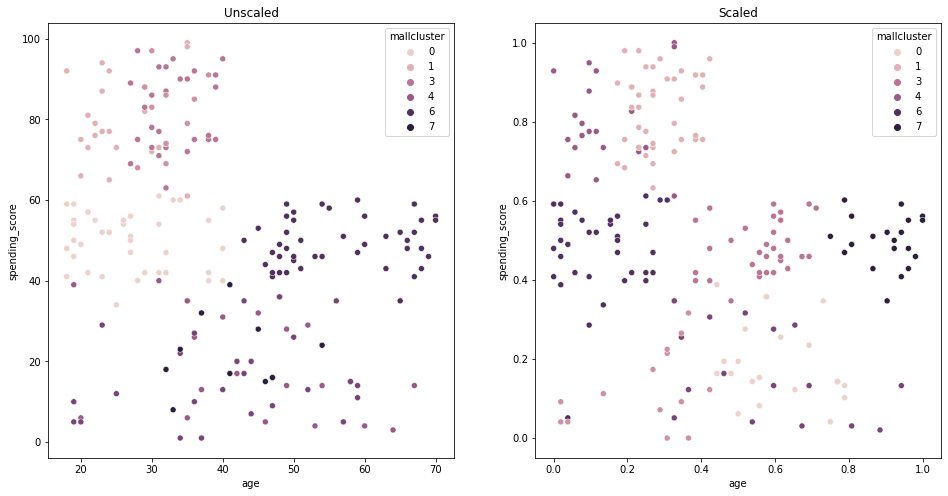

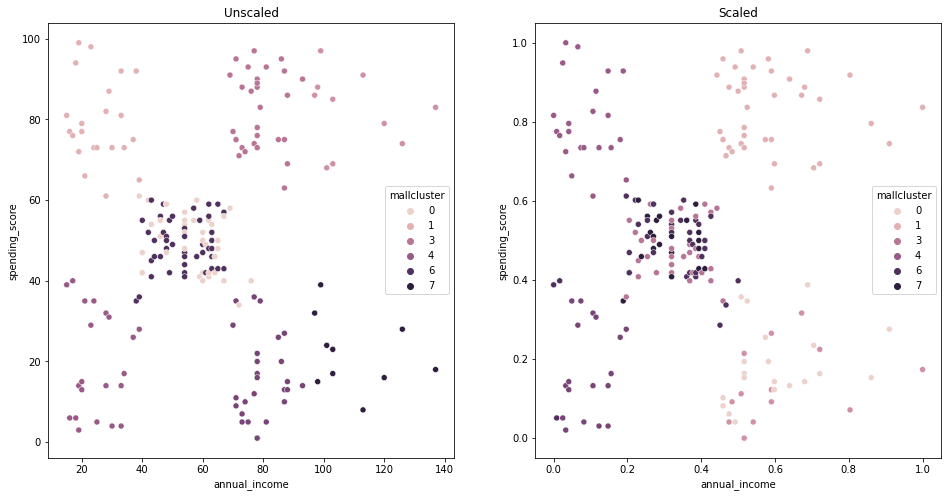

In [22]:
xmall2.drop(columns = ['is_male','mallcluster'], inplace=True)
xmall2_scaled.drop(columns = ['is_male','mallcluster'], inplace = True)

combos = list(combinations(xmall2.columns,2))

kmeans2 = KMeans(n_clusters=8)
kmeans2.fit(xmall2)
kmeans2.predict(xmall2)
xmall2['mallcluster'] = kmeans2.predict(xmall2)

kmeans_scaled2 = KMeans(n_clusters=8)
kmeans_scaled2.fit(xmall2_scaled)
kmeans_scaled2.predict(xmall2_scaled)
xmall2_scaled['mallcluster'] = kmeans_scaled2.predict(xmall2_scaled)

for i in combos:
    plt.figure(figsize = (16,8))
    plt.subplot(121)
    plt.title('Unscaled')
    sns.scatterplot(data=xmall2,x=i[0],y=i[1],  hue = 'mallcluster')
    plt.subplot(122)
    plt.title('Scaled')
    sns.scatterplot(data=xmall2_scaled, x=i[0],y=i[1], hue = 'mallcluster')
    plt.show()